In [17]:
import pandas as pd
import numpy as np
import csv
import sys
csv.field_size_limit(sys.maxsize)

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/cats.csv')
df['X'] = df['X'].apply(lambda x: np.fromstring(x.replace('\n','')
                                                .replace('[','')
                                                .replace(']',''), sep=',').reshape(100, 100, 3))
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,X,y
0,"[[[122.0, 119.0, 104.0], [122.0, 119.0, 104.0]...",Persian
1,"[[[105.0, 104.0, 100.0], [102.0, 101.0, 97.0],...",Ragdoll
2,"[[[43.0, 71.0, 121.0], [43.0, 71.0, 121.0], [4...",Ragdoll
3,"[[[36.0, 27.0, 18.0], [34.0, 25.0, 16.0], [33....",Bengal
4,"[[[187.0, 127.0, 91.0], [181.0, 121.0, 85.0], ...",Sphynx


In [34]:
from sklearn.utils import shuffle

def unique_count(df):
    unique, counts = np.unique(df, return_counts=True)
    print(dict(zip(unique, counts)))

X, y = shuffle(df['X'], df['y'])
unique_count(y[:1916])
unique_count(y[1916:])

X = df['X'].values/255
X = np.stack(X, axis=0)
print(X.shape)

y = pd.get_dummies(df['y'], columns=['y'])
classes = list(y.columns)
n_classes = len(classes)
y = y.values
print(classes)

{'Abyssinian': 160, 'Bengal': 163, 'Birman': 159, 'Bombay': 158, 'British Shorthair': 157, 'Egyptian Mau': 162, 'Maine Coon': 162, 'Persian': 159, 'Ragdoll': 161, 'Russian Blue': 158, 'Siamese': 164, 'Sphynx': 153}
{'Abyssinian': 38, 'Bengal': 37, 'Birman': 41, 'Bombay': 42, 'British Shorthair': 43, 'Egyptian Mau': 36, 'Maine Coon': 38, 'Persian': 41, 'Ragdoll': 39, 'Russian Blue': 42, 'Siamese': 36, 'Sphynx': 47}
(2396, 100, 100, 3)
['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Egyptian Mau', 'Maine Coon', 'Persian', 'Ragdoll', 'Russian Blue', 'Siamese', 'Sphynx']


Train on 1916 samples, validate on 480 samples
Epoch 1/20
1916/1916 [==============================] - 3s 1ms/step - loss: 2.4813 - acc: 0.0971 - val_loss: 2.4400 - val_acc: 0.1354
Epoch 2/20
1916/1916 [==============================] - 1s 755us/step - loss: 2.3597 - acc: 0.1686 - val_loss: 2.3052 - val_acc: 0.1708
Epoch 3/20
1916/1916 [==============================] - 1s 755us/step - loss: 2.2588 - acc: 0.2140 - val_loss: 2.2469 - val_acc: 0.2250
Epoch 4/20
1916/1916 [==============================] - 1s 760us/step - loss: 2.1805 - acc: 0.2317 - val_loss: 2.1550 - val_acc: 0.2417
Epoch 5/20
1916/1916 [==============================] - 1s 743us/step - loss: 2.1103 - acc: 0.2646 - val_loss: 2.0687 - val_acc: 0.2792
Epoch 6/20
1916/1916 [==============================] - 1s 748us/step - loss: 1.9928 - acc: 0.2975 - val_loss: 1.9348 - val_acc: 0.3271
Epoch 7/20
1916/1916 [==============================] - 1s 750us/step - loss: 1.8524 - acc: 0.3366 - val_loss: 1.8534 - val_acc: 0.3563
Epo

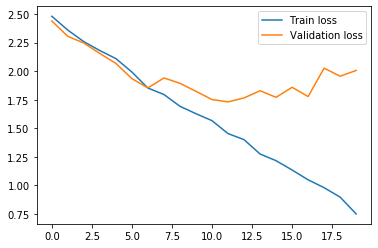

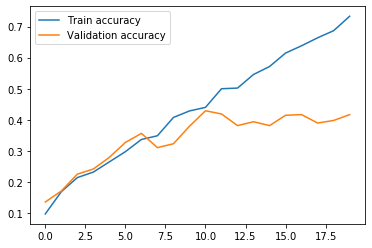

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
import matplotlib.pyplot as plt

brain = Sequential()

brain.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(100, 100, 3)))
brain.add(MaxPooling2D(pool_size=(2, 2)))
brain.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
brain.add(MaxPooling2D(pool_size=(2, 2)))
brain.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
brain.add(MaxPooling2D(pool_size=(2, 2)))
brain.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
brain.add(MaxPooling2D(pool_size=(2, 2)))
brain.add(Flatten())
brain.add(Dense(256, activation='relu'))
brain.add(Dropout(0.2))
brain.add(Dense(12, activation='softmax'))

brain.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])
output = brain.fit(X, y, validation_split=0.2, epochs=20)

plt.plot(output.history['loss'], label='Train loss')
plt.plot(output.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

plt.plot(output.history['acc'], label='Train accuracy')
plt.plot(output.history['val_acc'], label='Validation accuracy')
plt.legend()
plt.show()

Russian Blue 80.37951
Ragdoll 10.231089
British Shorthair 3.728095
Persian 1.969721
Birman 1.4332886
Siamese 0.767808
Abyssinian 0.6075823
Bombay 0.52499634
Maine Coon 0.19161001
Sphynx 0.12518527
Egyptian Mau 0.03318329
Bengal 0.007930619


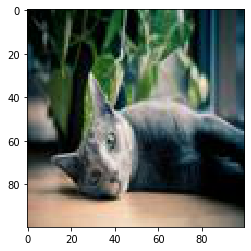

In [53]:
image = X[np.random.randint(1917, 2390)]

plt.imshow(image)
probs = brain.predict_proba(image.reshape(1, 100, 100, 3))*100

d = dict(zip(classes, probs[0]))
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}

for c, p in d.items():
    print(c, p)

Maine Coon 62.345695
Sphynx 12.219717
Abyssinian 11.607461
British Shorthair 5.1910915
Bengal 3.18739
Egyptian Mau 2.4739008
Persian 1.5850248
Russian Blue 0.63075066
Ragdoll 0.57798725
Birman 0.09564268
Siamese 0.04933997
Bombay 0.035994366


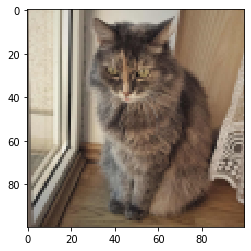

In [40]:
import cv2
 
image = cv2.imread('sz.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_AREA)/255

plt.imshow(image)
probs = brain.predict_proba(image.reshape(1, 100, 100, 3))*100

d = dict(zip(classes, probs[0]))
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}

for c, p in d.items():
    print(c, p)

In [0]:
brain.save('CatBreedifier_v1.h5')